Давайте для начала вспомним, в чём заключается задача снижения размерности.

>Задача снижения размерности — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

Основными целями снижения размерности являются:

* Сокращение времени работы моделей машинного обучения.
* Сокращение избыточной информации за счёт выделения наиболее влиятельных факторов.
* Подготовка данных для визуализации.

Мы знаем, что снижать размерность можно как **линейными**, так и **нелинейными** способами.

В этом модуле мы приведём обзор именно линейных методов снижения размерности. Начнём мы с **метода главных компонент (Principal Compoment Analysis, PCA)**.

Мы кратко познакомились с ним, когда говорили о задачах обучения без учителя в модуле ML-4. Обучение с учителем: кластеризация и техники понижения размерности. А сейчас посмотрим, на каких принципах линейной алгебры работает данный метод.

### **<center>ПОСТАНОВКА ЗАДАЧИ**

Допустим, мы хотим прогнозировать целевую переменную $\vec{y}$ по двум факторам: $\vec{x_1}$ и $\vec{x_2}$. В качестве модели мы можем использовать всё что угодно, но для конкретики мы возьмём модель линейной регрессии:

$$\vec{y}=w_{0} +w_{1}\vec{x_1}+w_{2}\vec{x_2}$$

Вспомним классический датасет о домах в Бостоне (Boston Housing Dataset). 

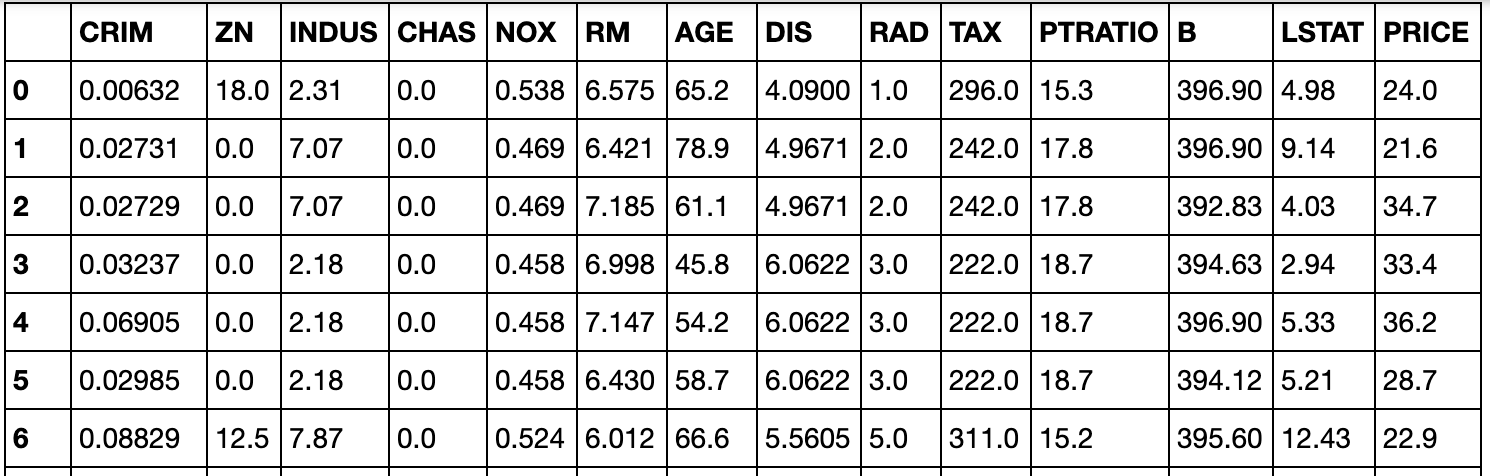

Рассмотрим в качестве признаков DIS и NOX — это усреднённое расстояние до Employment Centres и уровень загрязнения воздуха. 

Зададимся вопросом: верно ли, что взять оба признака лучше, чем один?

Два признака, как правило, содержат больше информации, чем один. Однако часто бывает, что они сильно скоррелированы. Это значит, что при построении оценки вектора весов линейной регрессии по классическому МНК:

$$\hat{\vec{w}}=(A^{T}A)^{-1}A^{T}\vec{y}$$

…мы можем получить плохо обусловленную матрицу Грама $A^{T}A$.

Мы не умеем идеально точно считать на компьютере, поэтому получим огромные ошибки из-за округлений. Получается, что хотя мы неизбежно теряем часть информации при выборе только одного признака, с вычислительной точки зрения это более выгодная стратегия.

Итак, мы хотим выбрать один фактор из двух, который даст нам лучшие регрессии.

На тепловой карте видно, что корреляция между нашими признаками DIS и NOX достаточно велика и составляет –0.77:

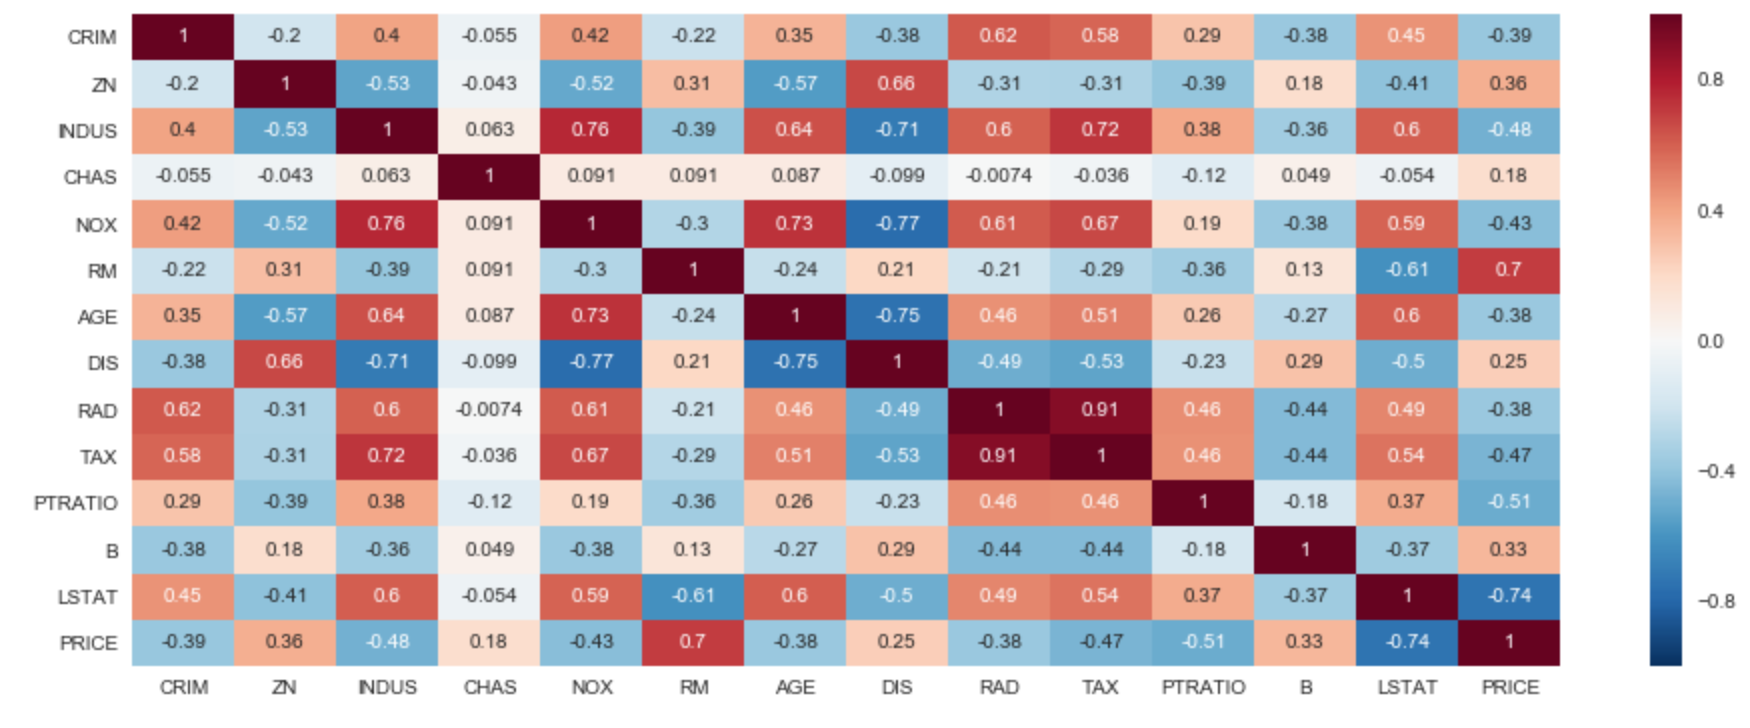

Это значит, что в районах, которые расположены ближе к Employment Centres, выше уровень загрязнения воздуха. 

На следующей картинке вы видите диаграмму рассеивания по этим двум признакам, а также линейную регрессию, построенную для зависимости фактора DIS от фактора NOX:

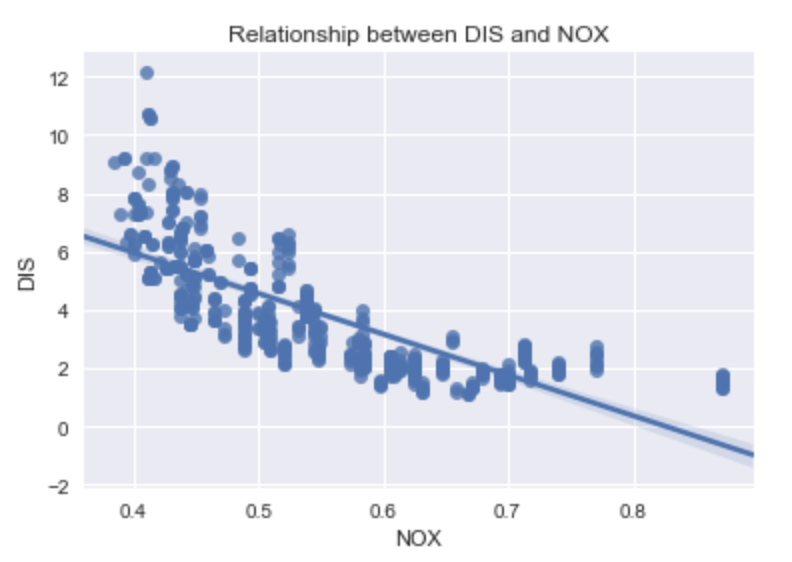

**Какой же фактор выбрать: NOX или DIS?**

Ни тот, ни другой! Наилучшим новым признаком окажется линейная комбинация из старых факторов, расположенная вдоль **синей прямой.**

Такая линейная комбинация называется **главной компонентой**. А алгоритм поиска этой комбинации как раз и называется **методом главных компонент**. Давайте приведём общую структуру алгоритма для случая двух факторов:

1. Составить корреляционную матрицу факторов  C. Она же — матрица Грама стандартизированных факторов:

$$C=corr(A)=G(x_{1_{st}}, x_{2_{st}})$$,

где $G(x_{1_{st}}, x_{2_{st}})$ — матрица Грама, составленная из стандартизированных факторов $x_{1_{st}}$ и $x_{2_{st}}$.

2. Найти собственные числа (спектр матрицы) и соответствующие им собственные числа матрицы C, решив характеристическое уравнение:

$$det(C-\lambda E)=0$$

3. Выбрать наибольшее собственное число из полученных $\lambda^{*}=max(\lambda_{1},\lambda_{2})$ и соответствующий ему собственный вектор $\vec{v^*}$.

4. Координаты выбранного собственного вектора $\vec{v_{1}^*}$ и $\vec{v_{2}^*}$ будут являться коэффициентами линейной комбинации стандартизированных факторов — главной компонентой:

$$\vec{x^*}=v_{1}^*\vec{x_{1_{st}}}+ v_{2}^*\vec{x_{2_{st}}}$$

**Примечание.** Дополнительно делается **нормировка** нового признака. Её можно выполнить в самом конце шага 4 после пересчёта, а можно нормировать собственные векторы на шаге 3 (так делает компьютер). Наличие или отсутствие нормировки не повлияет на большинство свойств главных компонент.

✍️ Давайте применим метод главных компонент для выбора оптимального признака в нашей задаче. Пусть NOX будет первым фактором, а DIS — вторым.

1. Вычислим корреляционную матрицу C:

$$corr(NOX, DIS)=-0.77$$
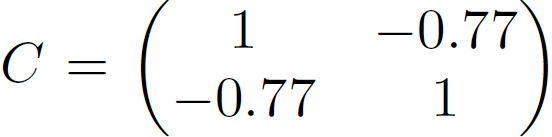

Свойства корреляционной матрицы гарантируют нам положительные собственные числа и полный набор собственных векторов.

2. Вычислим собственные числа и собственные вектора матрицы C:

Собственные числа:

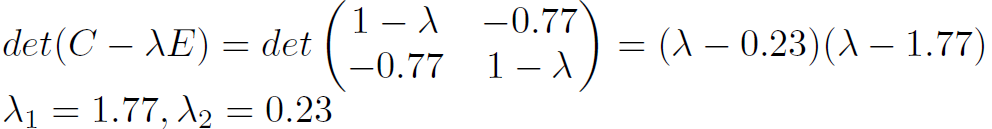

Собственные векторы:

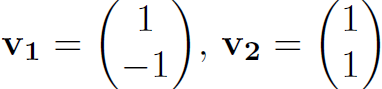

3. Выбираем максимальное из собственных чисел: $\lambda^{*}=max(\lambda_{1},\lambda_{2})=max(1.77, 0.23)=1.77$ и соответствующий ему собственный вектор, это будет $\vec{v^{*}}=v_{1}=(1, -1)^T$.

4. Координаты собственного вектора $\vec{v^*}$ будут коэффициентами для линейной комбинации старых признаков:

$$NEWFACTOR =1 \cdot NOX_{st} - 1 \cdot DIS_{st}$$

**Важно!** При составлении нового фактора нужно брать именно стандартизированные признаки: центрированные и нормированные к единичной длине:

$$NOX_{st}=\frac{NOX-NOX_{mean}}{\left \| NOX-NOX_{mean}\right \|}$$
$$DIS_{st}=\frac{DIS-DIS_{mean}}{\left \|DIS-DIS_{mean}\right \|}$$

5. Далее необходимо будет нормировать полученный фактор:

$$NEWFACTOR_{st}=\frac{NEWFACTOR}{\left \|NEWFACTOR\right \|}$$

На самом деле это даже не нормировка, а целая **стандартизация**, просто среднее значение $NEWFACTOR$ будет нулевым по особенностями построения.

$NEWFACTOR_{st}$ называется **главной компонентой.** Есть ещё одна главная компонента, соответствующая меньшему собственному числу $\lambda_2$ и собственному вектору $v_2$. Для понижения размерности и борьбы с мультиколлинеарностью мы берём только первую главную компоненту.


Возникает вопрос: изменится ли алгоритм метода главных компонент в общем случае при  факторах?

* **Шаги 1 и 2** не изменятся.
* **Шаг 3.** Для избавления от мультиколлинеарности нам нужно будет взять несколько самых больших собственных чисел и их айгенпар, а маленькие — игнорировать.
* **Шаг 4.** Можно пересчитать старые признаки в новые матричными преобразованием.

### **<center>АНАЛИЗ АЛГОРИТМА**

1. Так как собственные векторы корреляционной матрицы ортогональны, то и новые признаки (главные компоненты) тоже будут ортогональны. Для нас это будет означать **нескоррелированность.**

2. В случае плохой обусловленности выбор значимых главных компонент позволяет достичь меньшей потери точности по сравнению с регрессией на сырые данные.

3. Можно искать не все собственные векторы, а только значимые — с «большими» собственными числами.

4. Есть несколько подходов к тому, какие собственные числа считать «большими».

Самый простой из них — **метод Кайзера:** значимыми считаются только те компоненты, у которых собственное число больше среднего значения всех собственных чисел $\lambda_{mean}$:

**Примечание.** В нашем примере и согласно правилу Кайзера нужно выбрать одну компоненту.

Есть также **метод сломанной трости**. Иногда просто берут несколько максимальных собственных значений.

**Важное замечание.** В процессе выбора новых признаков никак не участвует целевая переменная. Если в нашем примере взять в качестве целевой переменной незначимую главную компоненту $NOX_{st} + DIS_{st}$ ,то наш новый классный признак вообще никак её не объяснит, потому что они ортогональны.

Тем не менее для БОЛЬШИНСТВА целевых переменных выбор значимых главных компонент даёт лучший прогноз среди всех возможных линейных комбинаций признаков.

>**ГРАНИЦЫ ПРИМЕНИМОСТИ**

>1. В случае хорошо обусловленных данных обрезать главные компоненты часто не нужно, так как потери точности могут оказаться больше, чем мы хотели бы.

>2. Для плохо обусловленных данных МАЛЫХ размерностей (для малого количества факторов) PCA — «то, что доктор прописал».

>3. Для плохо обусловленных данных БОЛЬШИХ размерностей (для большого количества факторов) при попытке применить PCA «в лоб» возникают вычислительные сложности.

>Дело в том, что если у нас, например, 10 000 факторов, то придётся считать, хранить и обрабатывать матрицу корреляций размера 10 000 × 10 000, что не слишком удобно с точки зрения памяти и скорости.

>Поэтому в таких случаях значимые главные компоненты вычисляют через сингулярное разложение матрицы данных.

В качестве дополнительной литературы рекомендуем вам:

* ознакомиться с **[примером](https://habr.com/ru/post/304214/)** применения метода главных компонент;
* прочесть статью о **[«Методе главных компонент».](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)**

In [ ]:
import pandas as pd
import numpy as np
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)